## MNIST Digit Classification Evaluating Multiple Classifiers

In [2]:
import numpy as np
from keras.datasets import mnist

from sklearn.utils import shuffle                                                                        
from sklearn import metrics                                                                                                  
                                                                                                  
from sklearn.tree import DecisionTreeClassifier                                                       
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC                                                                              
from sklearn.linear_model import LogisticRegression                                            

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier                                           

import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', context='notebook')

In [3]:
# Load Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape the data into 28 x 28 = 784 columns
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

#randomly shuffle the data
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [4]:
print(X_test.shape)

(10000, 784)


In [5]:
#The images are in grey scale where each number is between 0 to 255. Normalize them so that the values are between 0 and 1.
X_train_scaled = X_train / 255.0                                                                        
X_test_scaled = X_test / 255.0

In [6]:
# Create a multi class classifier based on random forest with default parameters.
rnf_model = RandomForestClassifier(random_state = 0) 
rnf_model.fit(X_train_scaled, y_train)

print(rnf_model)

y_pred_rnf = rnf_model.predict(X_test_scaled)
y_pred_proba_rnf = rnf_model.predict_proba(X_test_scaled)

test_acc = metrics.accuracy_score(y_test, y_pred_rnf)
print('RandomForestClassifier Testing accuracy: %.2f%%' % (test_acc * 100))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
RandomForestClassifier Testing accuracy: 94.72%


In [7]:
#Create a Decision tree with DEFAULT parameters and train it on **scaled** training data and test it on scaled testing data
tree_model = DecisionTreeClassifier(random_state = 0) 
tree_model.fit(X_train_scaled, y_train)

print(tree_model)

y_pred_tree = tree_model.predict(X_test_scaled)
y_pred_proba_tree = tree_model.predict_proba(X_test_scaled)

test_acc = metrics.accuracy_score(y_test, y_pred_tree)
print('DecisionTreeClassifier Testing accuracy: %.2f%%' % (test_acc * 100))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
DecisionTreeClassifier Testing accuracy: 87.81%


In [8]:
#Create a SVM based OneVsRestClassifier
ovr_linear_svc_svm_model  = OneVsRestClassifier(LinearSVC(random_state = 0)) 
ovr_linear_svc_svm_model.fit(X_train_scaled, y_train)

print(ovr_linear_svc_svm_model)   

y_pred_ovr_linear_svc_svm = ovr_linear_svc_svm_model.predict(X_test_scaled)
#y_pred_proba_ovr_linear_svc_svm = ovr_linear_svc_svm_model.predict_proba(X_test_scaled)

test_acc = metrics.accuracy_score(y_test, y_pred_ovr_linear_svc_svm)
print('SVM based OneVsRestClassifier Testing accuracy: %.2f%%' % (test_acc * 100))

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)
SVM based OneVsRestClassifier Testing accuracy: 91.83%


In [11]:
#Create a SVM based OneVsOneClassifier
ovo_linear_svc_svm_model  = OneVsOneClassifier(LinearSVC(random_state = 0)) 
ovo_linear_svc_svm_model.fit(X_train_scaled, y_train)

print(ovo_linear_svc_svm_model)   

y_pred_ovo_linear_svc_svm = ovo_linear_svc_svm_model.predict(X_test_scaled)
#y_pred_proba_ovo_linear_svc_svm = ovo_linear_svc_svm_model.predict_proba(X_test_scaled)

test_acc = metrics.accuracy_score(y_test, y_pred_ovo_linear_svc_svm)
print('SVM based OneVsOneClassifier Testing accuracy: %.2f%%' % (test_acc * 100))

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)
SVM based OneVsOneClassifier Testing accuracy: 93.70%


In [12]:
#Create a Gaussian NB
nb_gaussian_model = GaussianNB()
nb_gaussian_model.fit(X_train_scaled, y_train)

print(nb_gaussian_model) 

y_pred_gaussian_nb = nb_gaussian_model.predict(X_test_scaled)
y_pred_proba_gaussian_nb = nb_gaussian_model.predict_proba(X_test_scaled)

test_acc = metrics.accuracy_score(y_test, y_pred_gaussian_nb)
print('GaussianNB Testing accuracy: %.2f%%' % (test_acc * 100))

GaussianNB()
GaussianNB Testing accuracy: 55.58%


In [13]:
# Create a Logistic Regression model with default parameters.
lr_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 0)      
lr_model.fit(X_train_scaled, y_train)

print(lr_model)

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)

test_acc = metrics.accuracy_score(y_test, y_pred_lr)
print('LogisticRegression Testing accuracy: %.2f%%' % (test_acc * 100))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
LogisticRegression Testing accuracy: 92.57%


In [14]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)

# BaggingClassifier with BaseEstimators of 50 DecisionTreeClassifiers
bag_model = BaggingClassifier(base_estimator=tree,
                        n_estimators=50, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=0)

bag_model.fit(X_train_scaled, y_train)

print(bag_model)

y_pred_bag = bag_model.predict(X_test_scaled)
y_pred_proba_bag = bag_model.predict_proba(X_test_scaled)

test_acc = metrics.accuracy_score(y_test, y_pred_bag)
print('BaggingClassifier Testing accuracy: %.2f%%' % (test_acc * 100))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)
BaggingClassifier Testing accuracy: 95.25%


In [15]:
# AdaBoostClassifier with BaseEstimators of 50 DecisionTreeClassifiers
ada_model = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=50, 
                         learning_rate=0.1,
                         random_state=0)

ada_model.fit(X_train_scaled, y_train)

print(ada_model)

y_pred_ada = ada_model.predict(X_test_scaled)
y_pred_proba_ada = ada_model.predict_proba(X_test_scaled)

test_acc = metrics.accuracy_score(y_test, y_pred_ada)
print('AdaBoostClassifier Testing accuracy: %.2f%%' % (test_acc * 100))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
          learning_rate=0.1, n_estimators=50, random_state=0)
AdaBoostClassifier Testing accuracy: 87.81%


In [27]:
# Use keras to build a sequential feedforward network
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

# Convert the class labels (integers 0-9) into the one-hot format with Keras np_utils
y_train_ohe = np_utils.to_categorical(y_train)

In [28]:
# Initialize a new model using the Sequential class to implement a feedforward neural network and then add hidden layers to it
np.random.seed(0)
nn_model = Sequential()
# 784 input units for 28 x 28 pixel data
nn_model.add(Dense(input_dim=784, output_dim=50, init='uniform', activation='tanh')) 
# 50 hidden layer units plus 1 bias unit in each layer. Bias units are initialized to 0 in fully connected networks in Keras.
nn_model.add(Dense(input_dim=50, output_dim=50, init='uniform', activation='tanh'))
# Finally, the number of units in the output layer should be equal to the number of unique class labels 
# i.e.the number of columns in the one-hot encoded class label array.
nn_model.add(Dense(input_dim=50, output_dim=10, init='uniform', activation='softmax')) # 10 output units

In [29]:
# Configure a stochastic gradient descent optimizer
# set values for the weight decay constant and momentum learning to adjust the learning rate
sgd = SGD(lr=0.001, decay=1e-7, momentum=0.9)

# Lastly, we set the cost (or loss) function to categorical_crossentropy. The (binary) cross-entropy is just the technical 
# term for the cost function in logistic regression, and the categorical cross-entropy is its generalization for 
# multi-class predictions via softmax.
nn_model.compile(loss='categorical_crossentropy', optimizer=sgd)
print(nn_model)

In [30]:
# After compiling the model,now train it by calling the fit method.Here, we are using mini-batch stochastic gradient with 
# a batch size of 300 training samples per batch. We train the MLP over 50 epochs. We reserve 20 percent of the training data 
# (here, 12,000 samples) for validation after each epoch so that we can check if the model is overfitting during training
nn_model.fit(X=X_train, y=y_train_ohe, nb_epoch=50, batch_size=300, verbose=1, validation_split=0.2, show_accuracy=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s - loss: 2.2475 - acc: 0.3463 - val_loss: 2.1656 - val_acc: 0.5200
Epoch 2/50
48000/48000 [==============================] - 8s - loss: 1.9979 - acc: 0.5507 - val_loss: 1.7825 - val_acc: 0.5651
Epoch 3/50
48000/48000 [==============================] - 7s - loss: 1.5369 - acc: 0.6018 - val_loss: 1.3116 - val_acc: 0.6408
Epoch 4/50
48000/48000 [==============================] - 7s - loss: 1.1329 - acc: 0.6962 - val_loss: 0.9845 - val_acc: 0.7514
Epoch 5/50
48000/48000 [==============================] - 7s - loss: 0.8664 - acc: 0.8041 - val_loss: 0.7711 - val_acc: 0.8317
Epoch 6/50
48000/48000 [==============================] - 7s - loss: 0.6956 - acc: 0.8477 - val_loss: 0.6431 - val_acc: 0.8542
Epoch 7/50
48000/48000 [==============================] - 7s - loss: 0.5915 - acc: 0.8644 - val_loss: 0.5663 - val_acc: 0.8635
Epoch 8/50
48000/48000 [==============================] - 8s 

In [20]:
# Make predictions
y_pred_nn = nn_model.predict_classes(X_test, verbose=0)

test_acc = metrics.accuracy_score(y_test, y_pred_nn)
print('Neural Networks Classifier Testing accuracy: %.2f%%' % (test_acc * 100))

Neural Networks Classifier Testing accuracy: 91.30%


In [21]:
def get_misclassified_counts(y_pred):
    count, ratio = [], []
    for d in range(10):
        y_pred_d = y_pred[np.where(y_test == d)]
        mc = y_pred_d[np.where(y_pred_d != d)].size
        mcr = y_pred_d[np.where(y_pred_d != d)].size / y_pred_d.size
        count.append(mc)
        ratio.append(np.around([mcr], decimals=2))
    return count, ratio

In [22]:
models_pred = [y_pred_rnf, y_pred_tree, y_pred_ovr_linear_svc_svm, y_pred_ovo_linear_svc_svm, y_pred_gaussian_nb, 
                                                                           y_pred_lr, y_pred_bag, y_pred_ada, y_pred_nn]
for y_pred in models_pred:
    count, ratio = get_misclassified_counts(y_pred)
    print(count)
    print(ratio)

[10, 13, 61, 70, 51, 66, 38, 57, 79, 83]
[array([ 0.01]), array([ 0.01]), array([ 0.06]), array([ 0.07]), array([ 0.05]), array([ 0.07]), array([ 0.04]), array([ 0.06]), array([ 0.08]), array([ 0.08])]
[65, 45, 153, 145, 116, 141, 116, 99, 186, 153]
[array([ 0.07]), array([ 0.04]), array([ 0.15]), array([ 0.14]), array([ 0.12]), array([ 0.16]), array([ 0.12]), array([ 0.1]), array([ 0.19]), array([ 0.15])]
[18, 23, 118, 92, 69, 124, 49, 80, 131, 113]
[array([ 0.02]), array([ 0.02]), array([ 0.11]), array([ 0.09]), array([ 0.07]), array([ 0.14]), array([ 0.05]), array([ 0.08]), array([ 0.13]), array([ 0.11])]
[26, 15, 87, 68, 44, 96, 48, 70, 89, 87]
[array([ 0.03]), array([ 0.01]), array([ 0.08]), array([ 0.07]), array([ 0.04]), array([ 0.11]), array([ 0.05]), array([ 0.07]), array([ 0.09]), array([ 0.09])]
[110, 56, 766, 657, 814, 848, 63, 748, 326, 54]
[array([ 0.11]), array([ 0.05]), array([ 0.74]), array([ 0.65]), array([ 0.83]), array([ 0.95]), array([ 0.07]), array([ 0.73]), array

In [23]:
def plot_misclassified_images(models_pred, digit):
    y_test_d_index = np.where(y_test == digit)[0]
    all_misclassify_index = []
    for index in y_test_d_index:
        all_misclassify = True;
        for y_pred in models_pred:
            if y_pred[index] == digit:
                all_misclassify = False
                break
        if all_misclassify == True:
            all_misclassify_index.append(index)
    
    # To get an idea what the misclassified images in MNIST look like, let's visualize
    fig, ax = plt.subplots(nrows=2, ncols=8, sharex=True, sharey=True, figsize=(12, 4))
    ax = ax.flatten()
    img_index = 0
    for i in all_misclassify_index:
        img = X_test[i].reshape(28,28)
        ax[img_index].imshow(img, cmap='Greys', interpolation='nearest')
        ax[img_index].set_title('%d) t: %d' % (img_index+1, y_test[i]))
        img_index = img_index + 1
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()
    #print(all_misclassify_index)

### Having Some Fun
From misclassificationthe count and ratio it appears that 5 and 8 are the most misclassified digits. Let's plot the instances of 5 and 8 which have been misclassified by all classifiers.

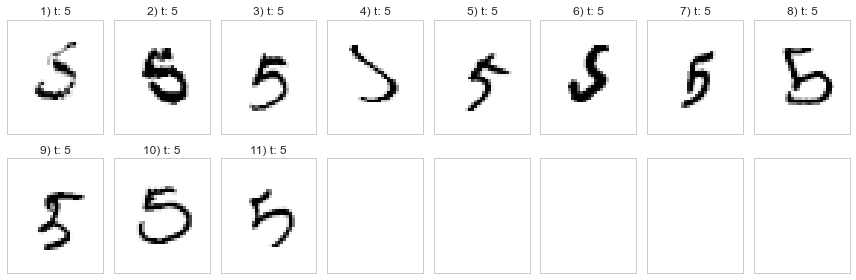

In [24]:
plot_misclassified_images(models_pred, 5)

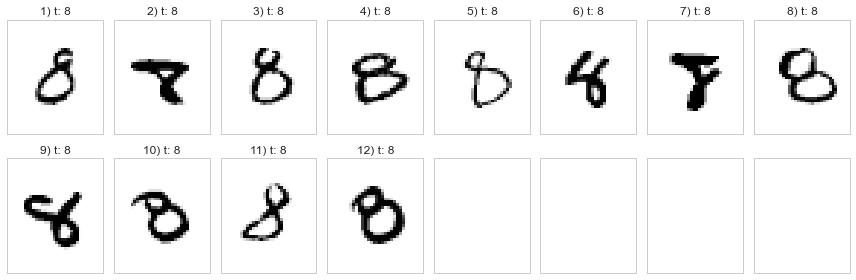

In [25]:
plot_misclassified_images(models_pred, 8)

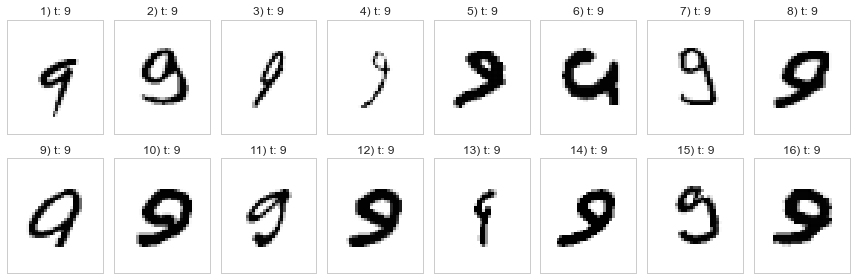

In [26]:
plot_misclassified_images(models_pred, 9)